<a href="https://colab.research.google.com/github/DivyaSadhana/COVID-19-Vaccines-ML-Model/blob/main/COVID19_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [215]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [216]:
Dataset = pd.read_excel(r'/content/gdrive/My Drive/COVID_Mater_Tracker.xlsx')
Dataset.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,...,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RPT_DATE,CAGE_YR,CAGE_MO
0,902418,Hypoaesthesia,24.0,Injection site hypoaesthesia,24.0,NaN,NaN,NaN,NaN,NaN,...,COVID19,PFIZER\BIONTECH,EH9899,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,56.0,NaN
1,902440,Headache,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,COVID19,PFIZER\BIONTECH,EH 9899,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,35.0,NaN
2,902446,Erythema,23.1,Feeling hot,23.1,Flushing,23.1,NaN,NaN,NaN,...,COVID19,PFIZER\BIONTECH,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,55.0,NaN
3,902464,Dizziness,23.1,Electrocardiogram normal,23.1,Hyperhidrosis,23.1,Laboratory test normal,23.1,Presyncope,...,COVID19,PFIZER\BIONTECH,EH9899,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,42.0,NaN
4,902465,Dysgeusia,23.1,Oral pruritus,23.1,Paraesthesia,23.1,Paraesthesia oral,23.1,Parosmia,...,COVID19,PFIZER\BIONTECH,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,60.0,NaN


In [ ]:
# Convert 'Symptom_Text' column into lower case

In [217]:
SYMPTOM_TEXT = Dataset['SYMPTOM_TEXT'].str.lower()
SYMPTOM_TEXT

0         patient experienced mild numbness traveling fr...
1                                              c/o headache
2         felt warm, hot and face and ears were red and ...
3         within 15 minutes progressive light-headedness...
4         pt felt wave come over body @ 1218 starting in...
                                ...                        
800187    three weeks after having gotten the pfizer cov...
800188                                          no symptoms
800189                                          no symptoms
800190    pt received proquad(mmrv) and pediatric pfizer...
800191    patient received monovalent vaccine on friday,...
Name: SYMPTOM_TEXT, Length: 800192, dtype: object

# Create key words for 'Heart Related Problems'.

In [218]:
Cardiac_Keywords =  '|'.join(['cardiac','cardio', 'heart','atrial','angina', 'tachycard', 'coronary', 'chest', 'myocardia', 'ischemi'])

# Detect existance of heart related problems in each row of 'Symptoms' description. Create new column, Append it to dataset and Change the Data Type to Integer

In [223]:
Cardiac_Disease = Dataset['SYMPTOM_TEXT'].str.contains(Cardiac_Keywords)
print(Cardiac_Disease)

0         False
1         False
2         False
3         False
4         False
          ...  
800187    False
800188    False
800189    False
800190    False
800191    False
Name: SYMPTOM_TEXT, Length: 800192, dtype: object


In [ ]:
## Append 'Cardiac Disease' column to the Dataset ##

In [232]:
Dataset['Cardiac_Disease'] = Cardiac_Disease
Dataset['Cardiac_Disease'].head(3)

0    0.0
1    0.0
2    0.0
Name: Cardiac_Disease, dtype: float64

In [234]:
# Replace values in the 'Cardiac_Disease' column
Dataset['Cardiac_Disease'] = np.where(Dataset['Cardiac_Disease'], 1, 0)

# Fill null/empty values with 0
Dataset['Cardiac_Disease'].fillna(0, inplace=True)

# Convert to integer type
Dataset['Cardiac_Disease'] = Dataset['Cardiac_Disease'].astype(int)

# Print the first 5 rows of the 'Cardiac_Disease' column
print(Dataset['Cardiac_Disease'].head(5))


0    0
1    0
2    0
3    0
4    0
Name: Cardiac_Disease, dtype: int64


#Calculate 'Mean' value for the 'Age' column

In [250]:

Dataset['AGE_YRS'] = pd.to_numeric(Dataset['AGE_YRS'], errors='coerce')
Mean_Age = Dataset['AGE_YRS'].mean(axis=0)
Mean_Age


48.00218197632568

#Replace all Null/Empty value rows of Age with its 'Mean' value.

In [251]:
Dataset['AGE_YRS'].fillna(Mean_Age, inplace=True)

# 'Age' data type should be in an integer (int) format without any decimals (float format)
Dataset['AGE_YRS'] = Dataset['AGE_YRS'].astype(int)
print(Dataset['AGE_YRS'].head(2))

0    56
1    35
Name: AGE_YRS, dtype: int64


In [ ]:
#Create Age_Group column to segregate patients age as 'Above 40Years' or 'Below 40Years'

In [266]:
def Age_Group (AGE_YRS):
  if AGE_YRS <= 40:
    return "0"
  if AGE_YRS >= 41:
    return "1"

print(Age_Group(30))
print(Age_Group(50))
print(Age_Group(25))
print(Age_Group(60))


0
1
0
1


##Append 'Age Group' column to the dataframe based on its source data column 'Age'

In [267]:
Dataset['Age_Group'] = Dataset['AGE_YRS'].apply(lambda x: Age_Group(x))
Dataset['Age_Group'].head(3)

0    1
1    0
2    1
Name: Age_Group, dtype: object

In [268]:
# Convert 'Age Group' column to Integer
Dataset['Age_Group'] = Dataset['Age_Group'].astype(int)
Dataset['Age_Group'].head(3)

0    1
1    0
2    1
Name: Age_Group, dtype: int64

In [ ]:
## Check whether DataFrame was reflecting Age Group column by retriving top 3 rows of dataset

In [269]:
Dataset.head(3)

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,...,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RPT_DATE,CAGE_YR,CAGE_MO,Cardiac_Disease,Age_Group
0,902418,Hypoaesthesia,24.0,Injection site hypoaesthesia,24.0,NaN,NaN,NaN,NaN,NaN,...,EH9899,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,56.0,NaN,0,1
1,902440,Headache,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,EH 9899,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,35.0,NaN,0,0
2,902446,Erythema,23.1,Feeling hot,23.1,Flushing,23.1,NaN,NaN,NaN,...,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,55.0,NaN,0,1


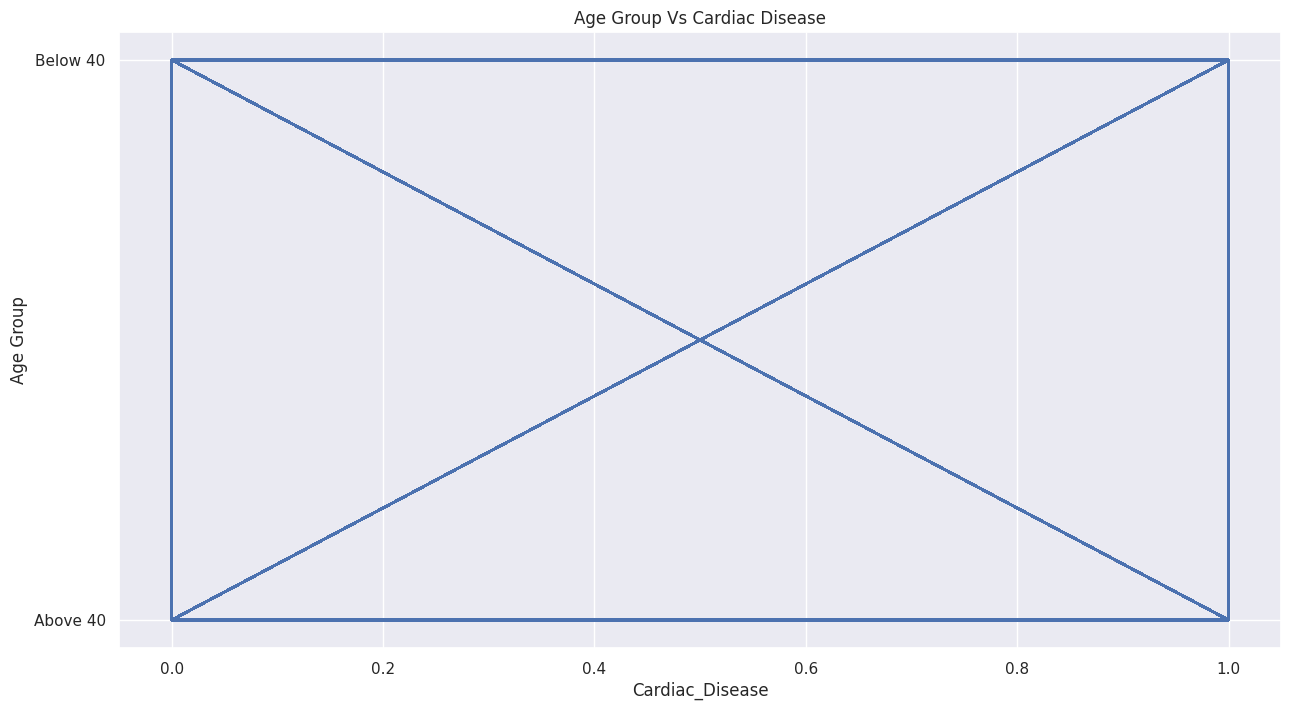

In [242]:
x=Dataset['Cardiac_Disease']
y=Dataset['Age_Group']
# set the chunksize parameter to 10000
# Since the number of data points in your plot exceeds the default limit set in the backend Agg.
# We can increase this limit by setting the agg.path.chunksize parameter in the rcParams dictionary to a larger value.
mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(x,y)
plt.xlabel('Cardiac_Disease')
plt.ylabel('Age Group')
plt.title('Age Group Vs Cardiac Disease')
plt.show()

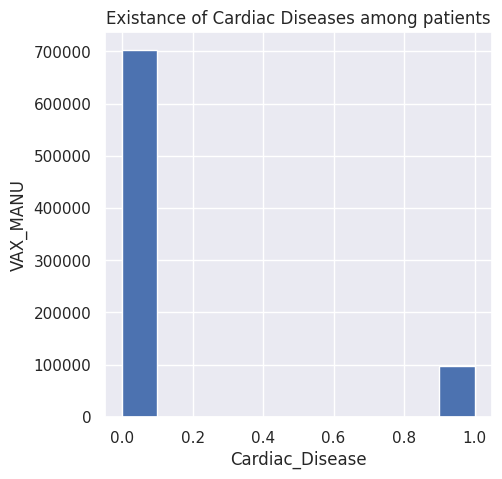

In [243]:

x_axis = Dataset['Cardiac_Disease']
y_axis = Dataset['VAX_MANU']
plt.figure(figsize=(5,5))
plt.hist(x_axis)
plt.xlabel('Cardiac_Disease')
plt.ylabel('VAX_MANU')
plt.title('Existance of Cardiac Diseases among patients')

plt.show()

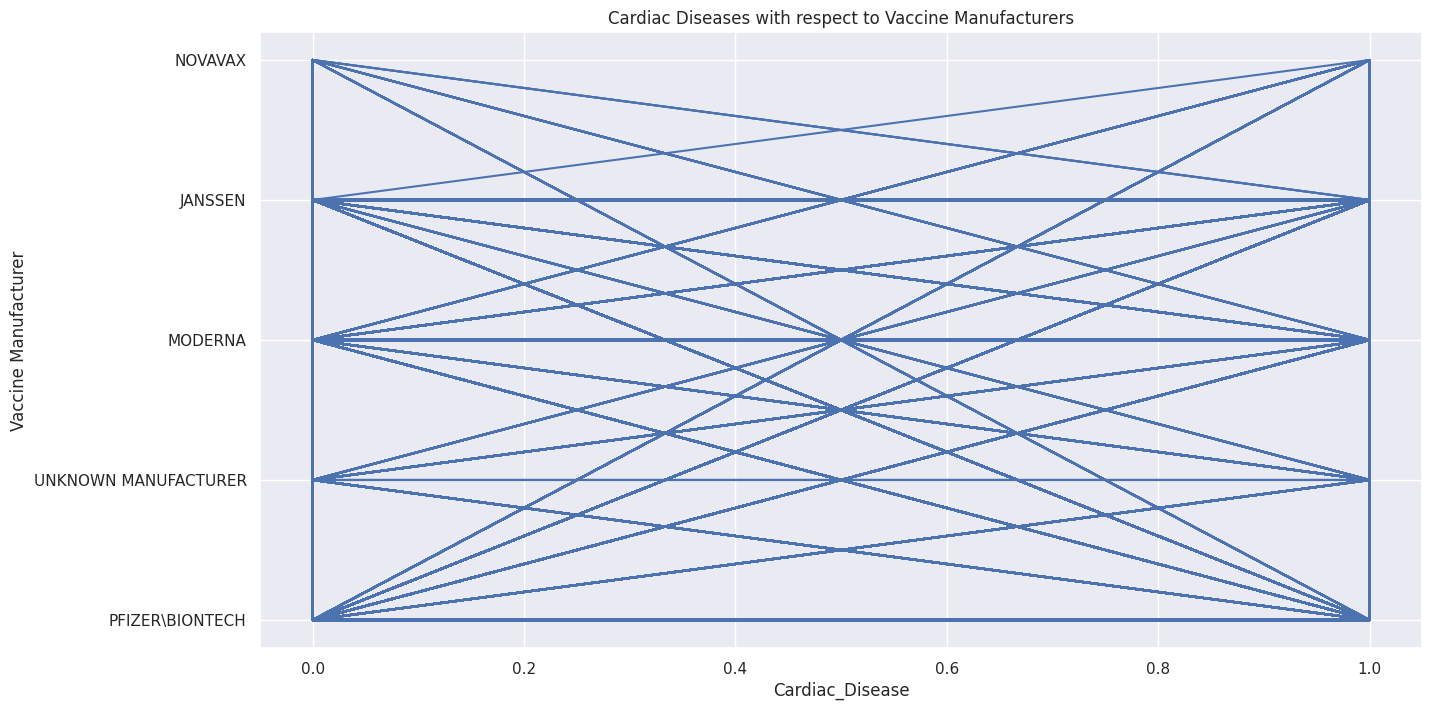

In [244]:
x=Dataset['Cardiac_Disease']
y=Dataset['VAX_MANU']
plt.xlabel('Cardiac_Disease')
plt.ylabel('Vaccine Manufacturer')
plt.title('Cardiac Diseases with respect to Vaccine Manufacturers')
plt.plot(x,y)
plt.show()

In [279]:
def Vaccine_Manufacturer(VAX_MANU):
  if VAX_MANU == 'NOVAVAX':
    return "1"
  if VAX_MANU == 'JANSSEN':
    return "2"
  if VAX_MANU == 'MODERNA':
    return "3"
  if VAX_MANU == 'UNKNOWN MANUFACTURER':
    return "4"
  if VAX_MANU == 'PFIZER\BIONTECH':
    return "5"

print(Vaccine_Manufacturer('NOVAVAX'))
print(Vaccine_Manufacturer('JANSSEN'))
print(Vaccine_Manufacturer('PFIZER\BIONTECH'))

1
2
5


# Append 'Vaccine Manufacture' column to dataset based on its Source data column 'Vax_Manu'.

In [282]:
#Without inclusion of 'Vax_Manu', column 'Vaccine Manufacturer' the result would throw error and cannot be added to dataset
Dataset['Vaccine_Manufacturer'] = Dataset['VAX_MANU'].apply(lambda x: Vaccine_Manufacturer(x))
Dataset['Vaccine_Manufacturer'].head(3)

0    5
1    5
2    5
Name: Vaccine_Manufacturer, dtype: object

In [283]:
DataFrame = Dataset[['Cardiac_Disease','Age_Group','VAX_MANU', 'Vaccine_Manufacturer']]
DataFrame.head(5)

,Cardiac_Disease,Age_Group,VAX_MANU,Vaccine_Manufacturer
0,0,1,PFIZER\BIONTECH,5
1,0,0,PFIZER\BIONTECH,5
2,0,1,PFIZER\BIONTECH,5
3,0,1,PFIZER\BIONTECH,5
4,0,1,PFIZER\BIONTECH,5


In [290]:
features = ['Age_Group','Vaccine_Manufacturer']
label = ['Cardiac_Disease']

x, y = DataFrame[features].values,DataFrame[label].values

In [ ]:
Label is Target

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets (70:30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier on the training data
classifier.fit(x_train, y_train)

# Predict the labels of the test data
y_pred = classifier.predict(x_test)

# Print the number of training and test cases
print('Training cases:', x_train.shape[0], '\nTest cases:', x_test.shape[0])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training cases: 560134 
Test cases: 240058


In [297]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

IndexError: ignored

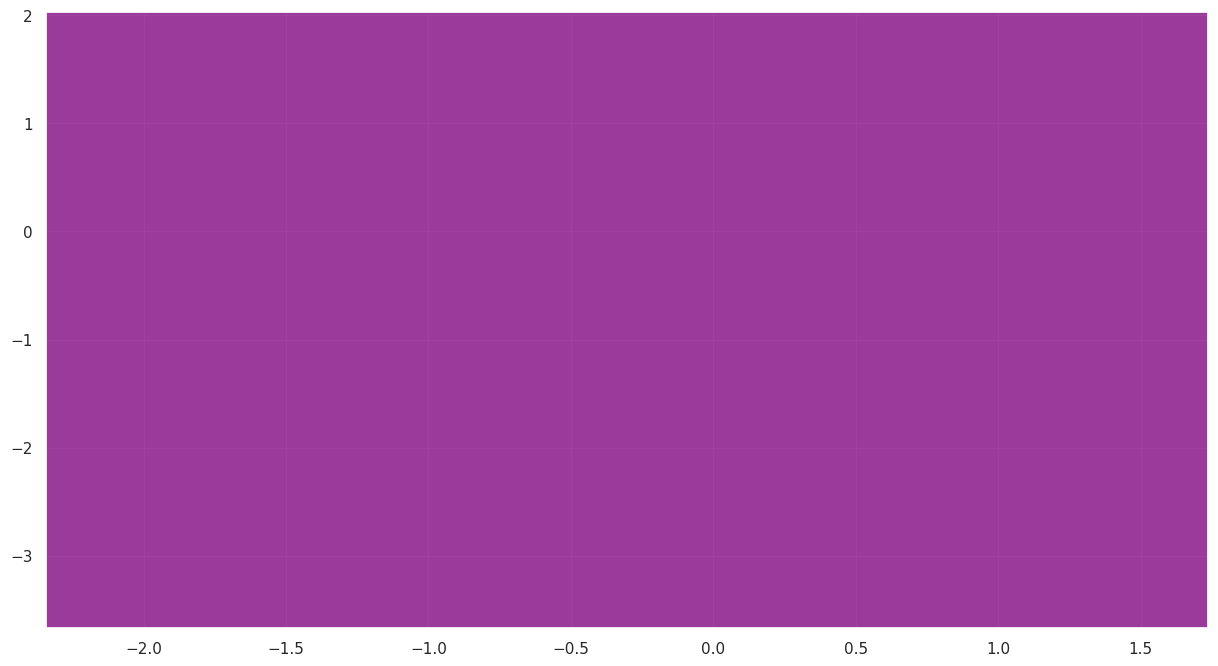

In [296]:
from matplotlib.colors import ListedColormap

# Create a meshgrid of points to plot the decision boundaries
X1, X2 = np.meshgrid(np.arange(start=x_train[:, 0].min() - 1, stop=x_train[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_train[:, 1].min() - 1, stop=x_train[:, 1].max() + 1, step=0.01))

# Plot the decision boundaries
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the training data points
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(x_train[y_train == j, 0], x_train[y_train == j, 1],
                c=ListedColormap(('purple', 'green'))(i), label=j)

# Add axis labels and a title
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age_Group')
plt.ylabel('Vaccine_Manufacturer')

# Add a legend
plt.legend()

# Show the plot
plt.show()